In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with BloodConnect India 2024.txt', 'r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
pattern = '\d{1,2}\/\d{1,2}\/\d{2,4}\, \d{1,2}\:\d{1,2} \- '

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ka449\AppData\Local\Temp\ipykernel_6848\2389577647.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}\/\d{1,2}\/\d{2,4}\, \d{1,2}\:\d{1,2} \- '


In [5]:
messages = re.split(pattern, data)[1:]

In [6]:
dates = re.findall(pattern, data)


In [7]:
df = pd.DataFrame({'user_message' : messages, 'message_date': dates})

In [8]:
df.head()

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,"25/06/23, 18:48 -"
1,"~ Anisha created group ""BloodConnect India 202...","03/04/20, 22:43 -"
2,Nitish Wahie added you\n,"25/06/23, 18:48 -"
3,Nitish Wahie added +91 80030 85446\n,"25/06/23, 18:56 -"
4,+91 70176 62350: https://www.instagram.com/ree...,"25/06/23, 20:17 -"


In [9]:
df['message_date'] = pd.to_datetime(df['message_date'], format = "%d/%m/%y, %H:%M - ")

In [10]:
df.rename(columns = {'message_date' : 'date'}, inplace = True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-06-25 18:48:00
1,"~ Anisha created group ""BloodConnect India 202...",2020-04-03 22:43:00
2,Nitish Wahie added you\n,2023-06-25 18:48:00
3,Nitish Wahie added +91 80030 85446\n,2023-06-25 18:56:00
4,+91 70176 62350: https://www.instagram.com/ree...,2023-06-25 20:17:00


In [11]:
df.shape

(7355, 2)

In [12]:
df['user_message']

0       Messages and calls are end-to-end encrypted. N...
1       ~ Anisha created group "BloodConnect India 202...
2                                Nitish Wahie added you\n
3                    Nitish Wahie added +91 80030 85446\n
4       +91 70176 62350: https://www.instagram.com/ree...
                              ...                        
7350                         +91 85430 32789: any group\n
7351      +91 85430 32789: today if possible before 5pm\n
7352    +91 85430 32789: For this <This message was ed...
7353    +91 80819 50150: @919758610285 \nPlease see if...
7354    Nitish Wahie: Not now.\n\nI have Shared the sa...
Name: user_message, Length: 7355, dtype: object

In [13]:
users = [] 
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns= ['user_message'], inplace = True)
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ka449\AppData\Local\Temp\ipykernel_6848\2423602666.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


,date,user,message
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202..."
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...


In [14]:
df['year'] = df['date'].dt.year

In [15]:
df.head()

,date,user,message,year
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202...",2020
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n,2023
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n,2023
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023


In [16]:
df['month'] = df['date'].dt.month_name()

In [17]:
df.head()

,date,user,message,year,month
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,June
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202...",2020,April
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n,2023,June
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n,2023,June
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023,June


In [18]:
df['day'] = df['date'].dt.day

In [19]:
df.head()

,date,user,message,year,month,day
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,June,25
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202...",2020,April,3
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n,2023,June,25
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n,2023,June,25
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023,June,25


In [20]:
df['hour'] = df['date'].dt.hour

In [21]:
df['minute'] = df['date'].dt.minute

In [22]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,June,25,18,48
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202...",2020,April,3,22,43
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n,2023,June,25,18,48
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n,2023,June,25,18,56
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023,June,25,20,17


In [23]:
df.shape

(7355, 8)

In [24]:
words = []
for message in df['message']:
    words.extend(message.split())

In [25]:
len(words)

74183

In [26]:
from urlextract import URLExtract
extractor = URLExtract()

In [27]:
links=  []

for message in df['message']:
    links.extend(extractor.find_urls(message))
    


In [28]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-06-25 18:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,June,25,18,48
1,2020-04-03 22:43:00,group_notification,"~ Anisha created group ""BloodConnect India 202...",2020,April,3,22,43
2,2023-06-25 18:48:00,group_notification,Nitish Wahie added you\n,2023,June,25,18,48
3,2023-06-25 18:56:00,group_notification,Nitish Wahie added +91 80030 85446\n,2023,June,25,18,56
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023,June,25,20,17


In [29]:
x = df['user'].value_counts().head()

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count = x.values

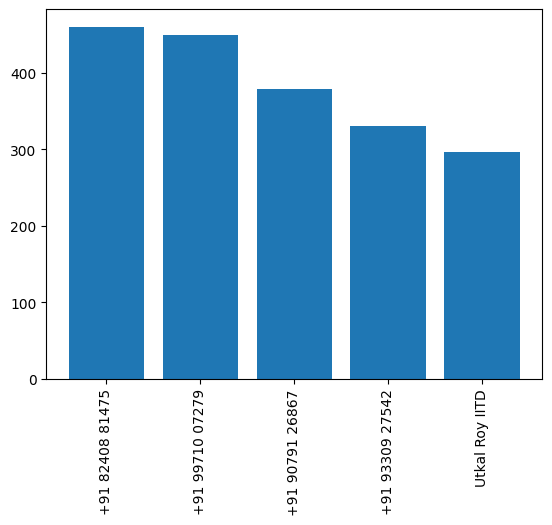

In [32]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'index':'name', 'user':'percent'})

,percent,count
0,+91 82408 81475,6.25
1,+91 99710 07279,6.12
2,+91 90791 26867,5.15
3,+91 93309 27542,4.50
4,Utkal Roy IITD,4.04
...,...,...
244,+91 81700 23685,0.01
245,+91 70078 73373,0.01
246,+91 90381 03444,0.01
247,+91 78729 65508,0.01


In [34]:
temp = df[df['user'] != 'group_notification']
temp

,date,user,message,year,month,day,hour,minute
4,2023-06-25 20:17:00,+91 70176 62350,https://www.instagram.com/reel/Ct6r8gGpsQv/?ig...,2023,June,25,20,17
5,2023-06-25 20:18:00,+91 97291 75486,❤️😂\n,2023,June,25,20,18
6,2023-06-25 21:50:00,+91 98186 94101,<Media omitted>\n,2023,June,25,21,50
7,2023-06-25 21:50:00,+91 83075 21955,Congratulations guys!🫱🏼‍🫲🏼❤️\n,2023,June,25,21,50
8,2023-06-25 21:51:00,+91 98186 94101,<Media omitted>\n,2023,June,25,21,51
...,...,...,...,...,...,...,...,...
7350,2024-10-11 11:23:00,+91 85430 32789,any group\n,2024,October,11,11,23
7351,2024-10-11 11:23:00,+91 85430 32789,today if possible before 5pm\n,2024,October,11,11,23
7352,2024-10-11 11:23:00,+91 85430 32789,For this <This message was edited>\n,2024,October,11,11,23
7353,2024-10-11 11:25:00,+91 80819 50150,@919758610285 \nPlease see if you can help in ...,2024,October,11,11,25


In [35]:
temp = temp[temp['message'] != '<Media omitted>\n']

In [36]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [37]:
words= []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
         words.append(word)

In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,blood,499
1,message,455
2,happy,424
3,team,415
4,camp,313
5,birthday,299
6,deleted,265
7,post,252
8,volunteers,187
9,<this,169


In [39]:
import emoji

In [42]:
def extract_emojis(message):
    return [char for char in message if emoji.is_emoji(char)]

In [44]:
emojis = []
for message in df['message']:
    emojis.extend(extract_emojis(message))


In [48]:
df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [49]:
df.head(5)

,0,1
0,🔥,607
1,✨,417
2,❤,335
3,🥳,318
4,🎉,278
